In [ ]:
#hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from dataoil.api import Api
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as ts
import numpy as np
%matplotlib inline

# Some data insights on WTI

In [ ]:
api = Api()
wti = api.fetch_spot(series_id='WTI')

In [ ]:
wti.head()

,date,price
0,2020-06-23,40.40
1,2020-06-22,40.60
2,2020-06-19,39.72
3,2020-06-18,38.79
4,2020-06-17,37.91


we can see that wti is reversed. we would like to have the first data point of wti prices as the first index

In [ ]:
wti = wti.iloc[::-1]

In [ ]:
wti.head()

,date,price
8697,1986-01-02,25.56
8696,1986-01-03,26.00
8695,1986-01-06,26.53
8694,1986-01-07,25.85
8693,1986-01-08,25.87


let see if we got some missing values

In [ ]:
wti.isnull().sum()

date     0
price    0
dtype: int64

In [ ]:
from dataoil.plot import plot1, plotN, distplot

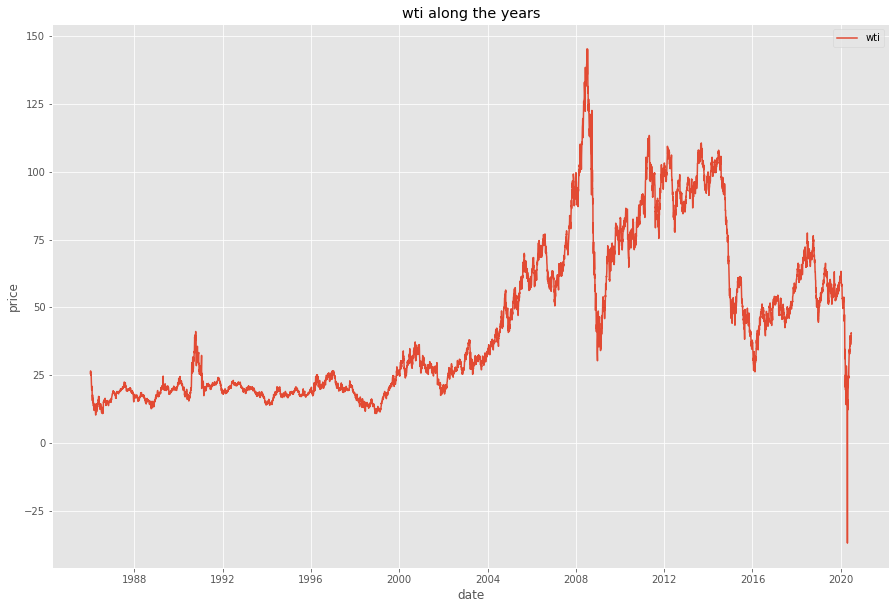

In [ ]:
plot1(wti.date, wti.price,title='wti along the years',label='wti', xlabel='date', ylabel='price')

In [ ]:
brent = api.fetch_spot(series_id='BRENT')
brent.head()

,date,price
0,2020-06-23,42.72
1,2020-06-22,43.20
2,2020-06-19,42.33
3,2020-06-18,41.75
4,2020-06-17,40.47


In [ ]:
brent = brent.iloc[::-1]

In [ ]:
brent.isnull().sum()

date     0
price    0
dtype: int64

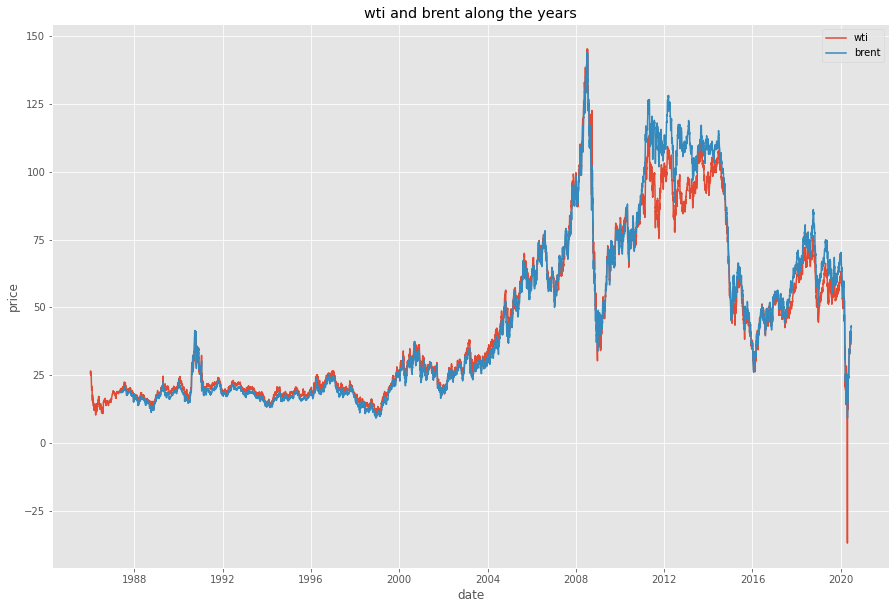

In [ ]:
plotN([wti.date, brent.date],[wti.price, brent.price], title='wti and brent along the years',labels=['wti','brent'], xlabel='date', ylabel='price')

it seems that wti and brent are really really close !

In [ ]:
df = pd.merge(wti,brent, how='inner', left_on='date', right_on='date',suffixes=('_wti','_brent'))
df.head()

,date,price_wti,price_brent
0,1987-05-20,19.75,18.63
1,1987-05-21,19.95,18.45
2,1987-05-22,19.68,18.55
3,1987-05-26,19.35,18.63
4,1987-05-27,19.38,18.60


In [ ]:
df.loc[:,['price_wti','price_brent']].corr()

,price_wti,price_brent
price_wti,1.000000,0.989871
price_brent,0.989871,1.000000


something interesting to look at is the returns or log returns of the price and try to see if those are normal or not or at least stationnary

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df['log_return_wti'] = np.log(df.price_wti) - np.log(df.price_wti.shift(1))
df['log_return_brent'] = np.log(df.price_brent) - np.log(df.price_brent.shift(1))

/Users/louis-alexisdubief/work/venv/dataoil/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.head()

,price_wti,price_brent,log_return_wti,log_return_brent
date,,,,
1987-05-20,19.75,18.63,NaN,NaN
1987-05-21,19.95,18.45,0.010076,-0.009709
1987-05-22,19.68,18.55,-0.013626,0.005405
1987-05-26,19.35,18.63,-0.016910,0.004303
1987-05-27,19.38,18.60,0.001549,-0.001612


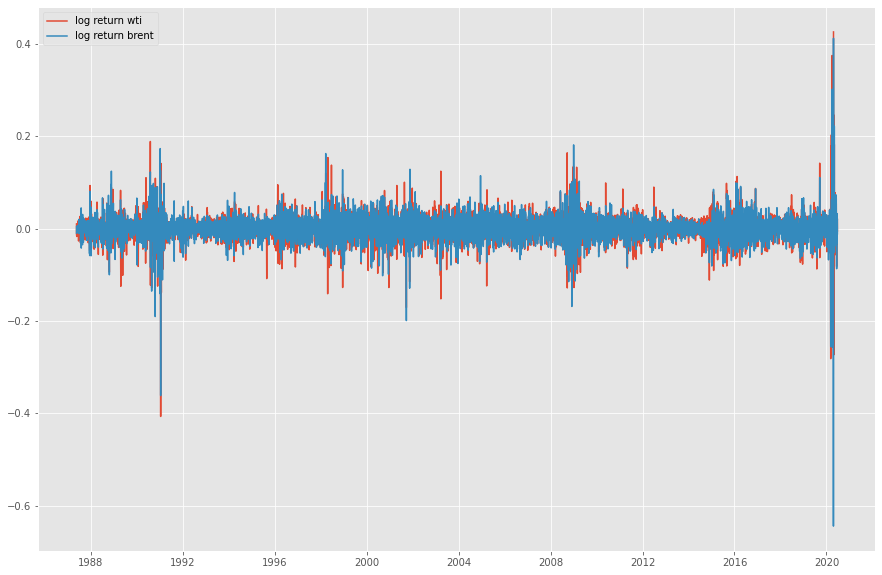

In [ ]:
plotN([df.index, df.index],[df.log_return_wti,df.log_return_brent], labels=['log return wti', 'log return brent'])

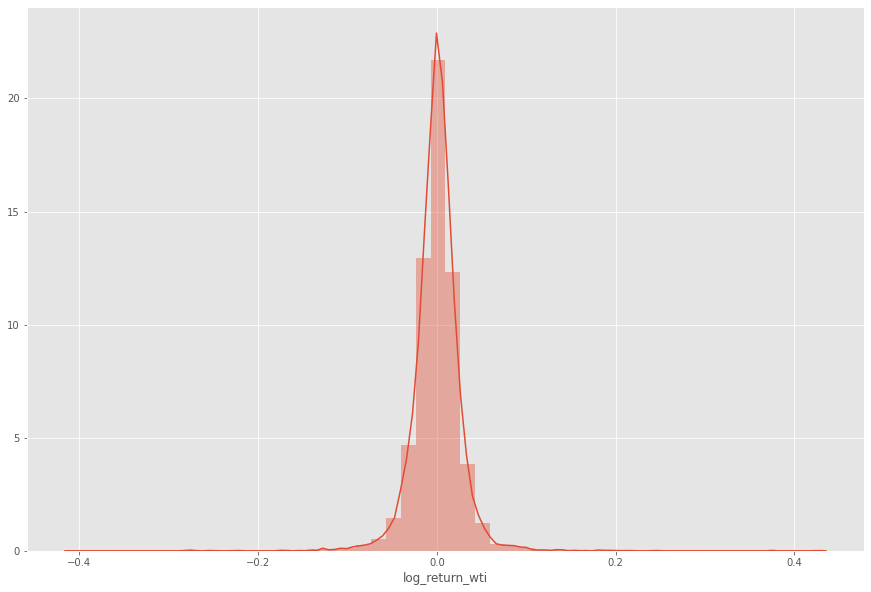

In [ ]:
distplot(df.log_return_wti)